📁 Upload your 'nba_traditional_RS_2020_2025.csv' file


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025 (2).csv


/tmp/ipython-input-6-4054074124.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_svs, x='Shooting_Versatility_Score', y='PLAYER', palette='mako')


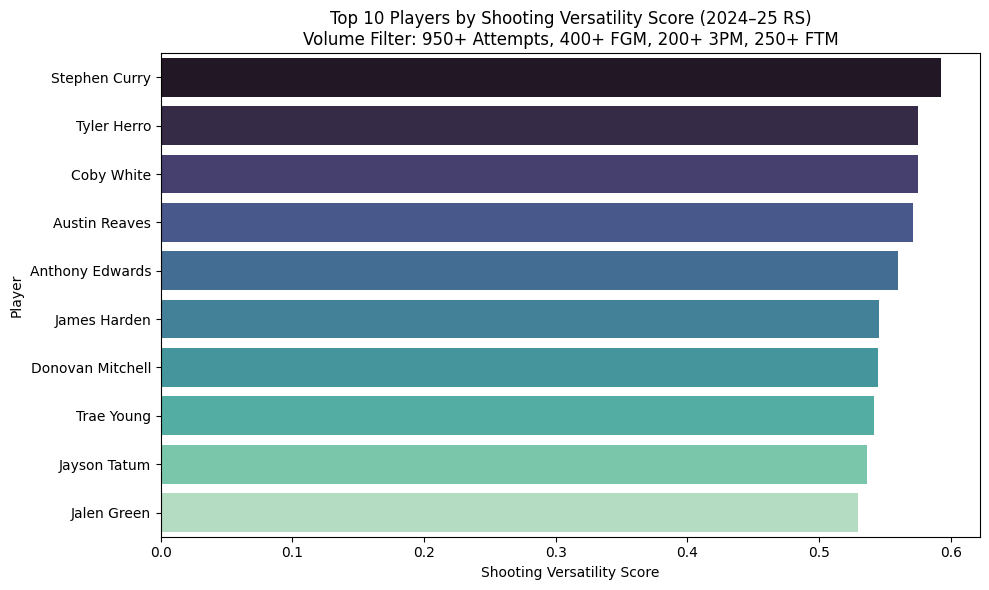

In [6]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Skip this if not using Colab

# 📂 Step 2: Upload the CSV File
print("📁 Upload your 'nba_traditional_RS_2020_2025.csv' file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📥 Step 3: Load the CSV File
df = pd.read_csv(filename)

# 🔍 Step 4: Filter for 2024–25 Regular Season
df = df[(df['Year'] == '2024-25') & (df['Season_Type'] == 'Regular Season')].copy()

# 🔧 Step 5: Convert Required Columns to Numeric
columns_to_convert = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'FGM', 'FG3M', 'FTM', 'FGA', 'FTA']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 🧠 Step 6: Compute Shooting Versatility Score
df['Shooting_Versatility_Score'] = (df['FG_PCT'] + df['FG3_PCT'] + df['FT_PCT']) / 3

# ✅ Step 7: Apply HARD Volume Filters
df = df[
    (df['FGA'] + df['FTA'] > 950) &  # High scoring involvement
    (df['FGM'] >= 400) &             # Reliable volume shooter
    (df['FG3M'] >= 200) &            # Elite from 3
    (df['FTM'] >= 250)               # Draws lots of fouls
]

# 🥇 Step 8: Top 10 Players by SVS
top10_svs = df.sort_values(by='Shooting_Versatility_Score', ascending=False).head(10)[
    ['PLAYER', 'Shooting_Versatility_Score', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'FGM', 'FG3M', 'FTM']
]

# 📊 Step 9: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_svs, x='Shooting_Versatility_Score', y='PLAYER', palette='mako')
plt.title('Top 10 Players by Shooting Versatility Score (2024–25 RS)\nVolume Filter: 950+ Attempts, 400+ FGM, 200+ 3PM, 250+ FTM')
plt.xlabel('Shooting Versatility Score')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('top10_svs_strict_2024_25.jpg', dpi=300)
plt.show()

# 💾 Step 10: Save to CSV
top10_svs.to_csv('top10_shooting_versatility_score_strict_2024_25.csv', index=False)